# Simulate and Analyze Model of Krumsiek et al. (2011)

Here, we are going to simulate some data using a literature-curated boolean gene regulatory network, which is believed to describe myeloid differentiation (Krumsiek et al., 2011). Using `sc.sim`, the boolean model is translated into a stochastic differential equation (Wittmann et al., 2009). Simulations result in branching time series of gene expression, where each branch corresponds to a certain cell fate of common myeloid progenitors (megakaryocytes, erythrocytes, granulocytes and monocytes).

In [1]:
from sys import path
path.insert(0,'..')
import scanpy as sc

# set very low png resolution, to decrease storage space
sc.sett.dpi(30)
# show some output
sc.sett.verbosity = 1

reading params file ../sim/krumsiek11_params.txt
writing to directory ../write/krumsiek11_sim
restart 0 new branch
restart 1 new branch
restart 2 no new branch
restart 3 no new branch
restart 4 no new branch
restart 5 no new branch
restart 6 no new branch
restart 7 no new branch
restart 8 no new branch
restart 9 new branch
restart 10 no new branch
restart 11 no new branch
restart 12 no new branch
restart 13 no new branch
restart 14 no new branch
restart 15 no new branch
restart 16 no new branch
restart 17 no new branch
restart 18 no new branch
restart 19 no new branch
restart 20 no new branch
restart 21 no new branch
restart 22 no new branch
restart 23 no new branch
restart 24 no new branch
restart 25 no new branch
restart 26 no new branch
restart 27 no new branch
restart 28 no new branch
restart 29 no new branch
restart 30 no new branch
restart 31 no new branch
restart 32 no new branch
restart 33 no new branch
restart 34 no new branch
restart 35 no new branch
restart 36 no new branch


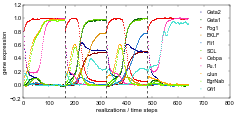

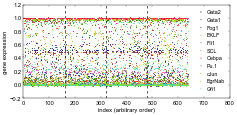

In [2]:
# let us now attack the true model by Krumsiek et al. (2011)
params = sc.read_params('../sim/krumsiek11_params.txt')
# pass params as keyword arguments
ddata = sc.sim(**params)
sc.plot(ddata)

computing Diffusion Map with method "local"
0:00:26.001 - computed distance matrix with metric = sqeuclidean
0:00:00.006 - determined k = 5 nearest neighbors of each point
0:00:00.017 - computed W (weight matrix) with "knn" = False
0:00:00.002 - computed K (anisotropic kernel)
0:00:00.005 - computed Ktilde (normalized anistropic kernel)
0:00:00.626 - computed Ktilde's eigenvalues:
[ 1.                0.99993706307426  0.99991247662991  0.99982497190721
  0.99976772986157  0.99931303501302  0.9989748635937   0.99866417673645
  0.99823433744463  0.99806438090514]
perform Diffusion Pseudotime Analysis
0:00:00.108 - computed M matrix
0:00:00.284 - computed Ddiff distance matrix
detect 2 branchings
tip points [118 306 627] = [third start end]
tip points [128 114 241] = [third start end]
0:00:00.105 - finished branching detection


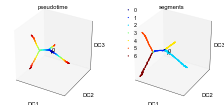

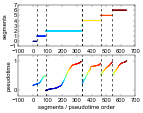

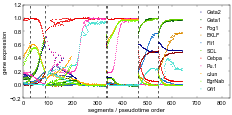

In [3]:
ddata['xroot'] = ddata['X'][0]
ddpt = sc.dpt(ddata, num_branchings=2)
sc.plot(ddpt, ddata, layout='3d', legendloc='upper left')